In [21]:
# Import necessary libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('code'))
from gradcam import *
from zipfile import ZipFile
from fastai.vision import * 
from fastai.metrics import error_rate
from PIL import Image
import matplotlib.pyplot as plt
# constants
path_img = 'images/data'

In [2]:
# Do initially to extract images from zip
with ZipFile('images/data_2.zip', 'r') as zip: 
    zip.extractall('images')

In [22]:
data = ImageDataBunch.from_folder(path_img, size=640, bs=8).normalize(imagenet_stats)
# data.show_batch(rows=4, figsize=(10,6))

epoch,train_loss,valid_loss,error_rate,time
0,1.495486,0.992490,0.364583,00:11
1,0.804235,0.285781,0.104167,00:11
2,0.518675,0.253544,0.072917,00:11
3,0.322500,0.319840,0.104167,00:11
4,0.285075,0.261558,0.083333,00:11
5,0.279395,0.135588,0.072917,00:11
6,0.219345,0.281708,0.083333,00:11
7,0.204050,0.236366,0.104167,00:11
8,0.176317,0.155390,0.052083,00:11
9,0.169566,0.115665,0.041667,00:11


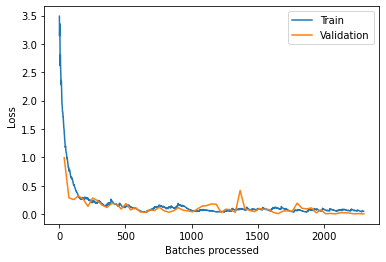

In [23]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.fit(64)
learn.recorder.plot_losses() 

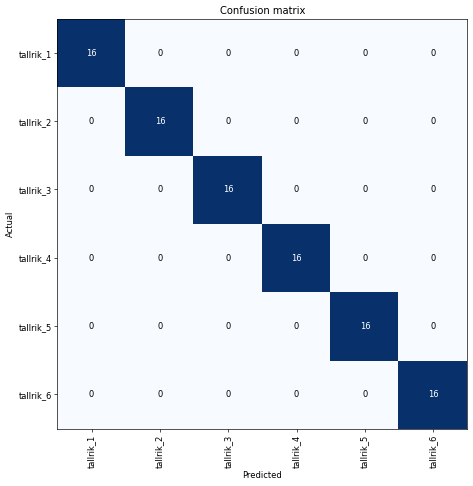

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

### GradCam images

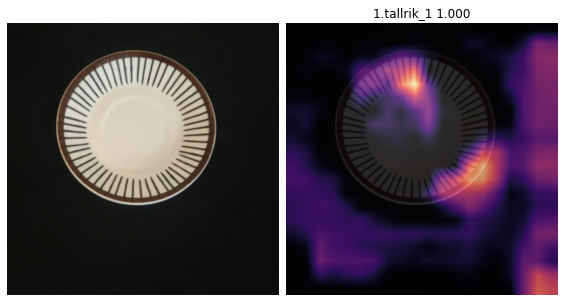

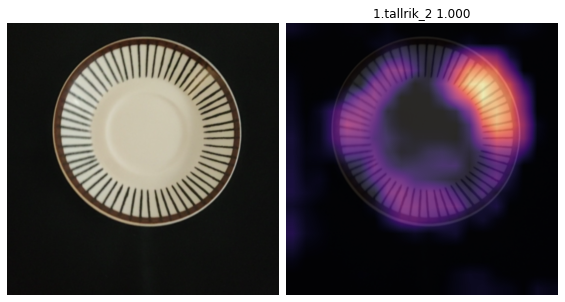

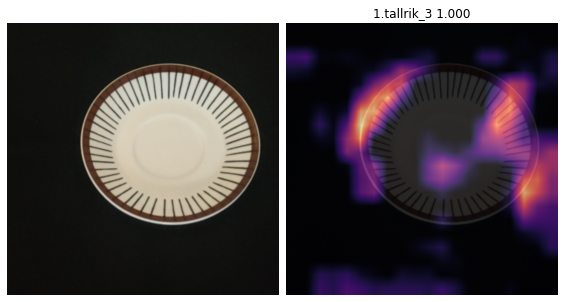

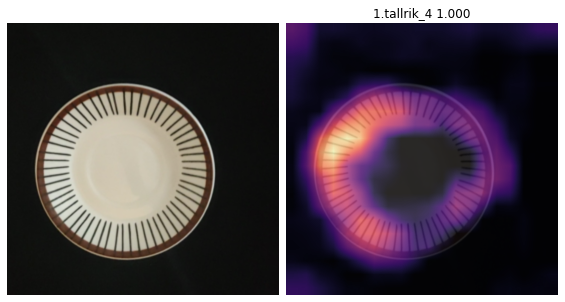

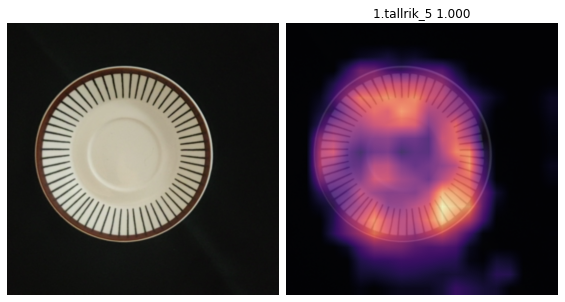

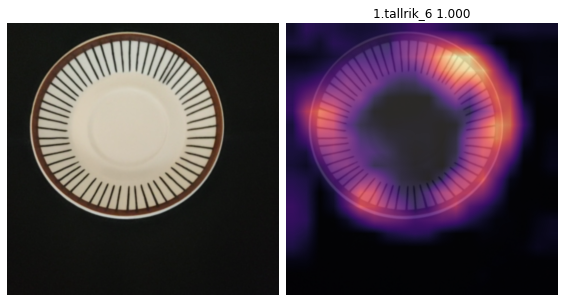

In [25]:
# Using one image from each validation set.
valid_plate_1 = open_image(path_img+'/valid/tallrik_1/1586527524387-0006.png');
valid_plate_2 = open_image(path_img+'/valid/tallrik_2/1586527650509-0015.png');
valid_plate_3 = open_image(path_img+'/valid/tallrik_3/1586527774489-0010.png');
valid_plate_4 = open_image(path_img+'/valid/tallrik_4/1586527881568-0003.png');
valid_plate_5 = open_image(path_img+'/valid/tallrik_5/1586527988265-0002.png');
valid_plate_6 = open_image(path_img+'/valid/tallrik_6/1586528086152-0010.png');
gcam = GradCam.from_one_img(learn,valid_plate_1)
gcam.plot(plot_gbp=False)
gcam = GradCam.from_one_img(learn,valid_plate_2)
gcam.plot(plot_gbp=False)
gcam = GradCam.from_one_img(learn,valid_plate_3)
gcam.plot(plot_gbp=False)
gcam = GradCam.from_one_img(learn,valid_plate_4)
gcam.plot(plot_gbp=False)
gcam = GradCam.from_one_img(learn,valid_plate_5)
gcam.plot(plot_gbp=False)
gcam = GradCam.from_one_img(learn,valid_plate_6)
gcam.plot(plot_gbp=False)